In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


fact_engagement_summary = pd.read_csv('./reporting/fact_engagement_summary.csv')  
fact_feedback_summary = pd.read_csv('./reporting/fact_feedback_summary.csv')      



In [4]:
pip install mlflow


Note: you may need to restart the kernel to use updated packages.


# EDA

In [6]:
import mlflow
import mlflow.sklearn

# analysis on data exploring data 

In [8]:
print("### Data Overview ###")
print(fact_engagement_summary.info())
print(fact_feedback_summary.info())


### Data Overview ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   learningMaterialKey  628 non-null    int64  
 1   title                628 non-null    object 
 2   department           628 non-null    object 
 3   total_engagements    628 non-null    int64  
 4   total_quiz_score     628 non-null    int64  
 5   avg_quiz_score       628 non-null    float64
 6   total_completed      628 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 34.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   learningMaterialKey  640 non-null    int64  
 1   title                640 non-null    object 
 2   department           640 non-null    object 
 3

In [9]:
print(" Missing Values ")
print(fact_engagement_summary.isnull().sum())
print(fact_feedback_summary.isnull().sum())


 Missing Values 
learningMaterialKey    0
title                  0
department             0
total_engagements      0
total_quiz_score       0
avg_quiz_score         0
total_completed        0
dtype: int64
learningMaterialKey    0
title                  0
department             0
total_feedbacks        0
avg_rating             0
dtype: int64


In [10]:
print(" Summary Statistics ")
print(fact_engagement_summary.describe())
print(fact_feedback_summary.describe())


 Summary Statistics 
       learningMaterialKey  total_engagements  total_quiz_score  \
count           628.000000         628.000000        628.000000   
mean            501.619427           1.592357         81.756369   
std             288.924498           0.820047         54.155923   
min               3.000000           1.000000          0.000000   
25%             246.750000           1.000000         41.750000   
50%             505.500000           1.000000         75.000000   
75%             751.500000           2.000000        109.000000   
max            1000.000000           5.000000        323.000000   

       avg_quiz_score  total_completed  
count      628.000000       628.000000  
mean        51.435801         0.777070  
std         24.980224         0.737241  
min          0.000000         0.000000  
25%         34.000000         0.000000  
50%         53.000000         1.000000  
75%         70.000000         1.000000  
max        100.000000         4.000000  
      

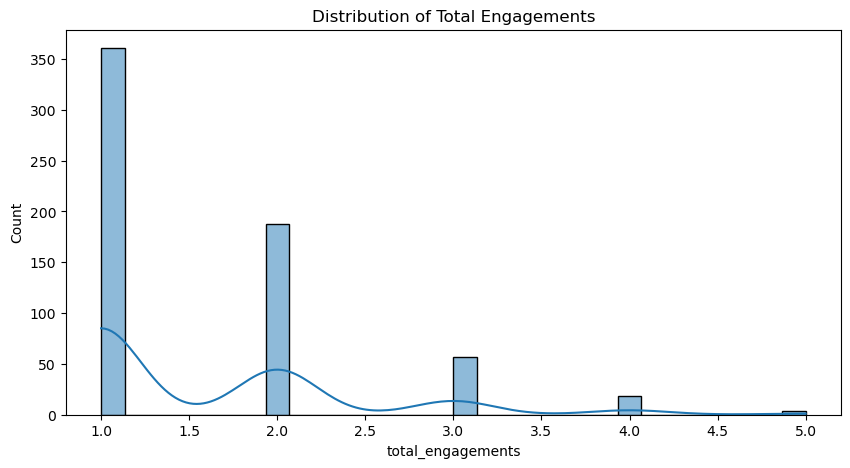

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(fact_engagement_summary['total_engagements'], bins=30, kde=True)
plt.title('Distribution of Total Engagements')
plt.show()

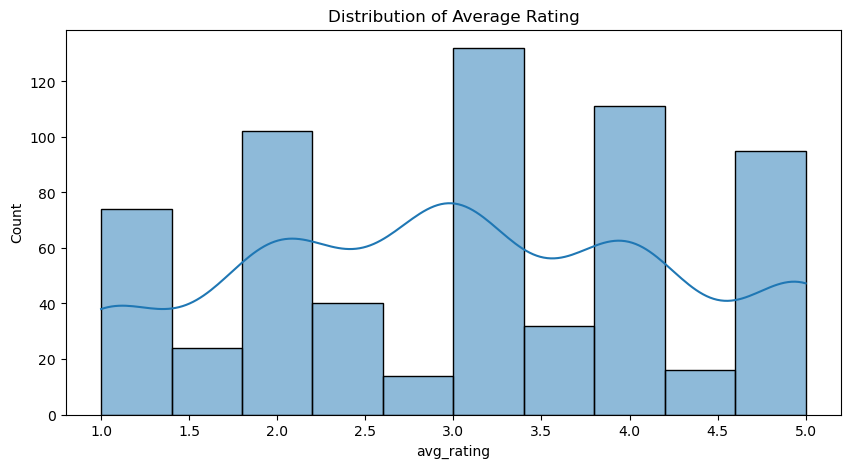

In [12]:

plt.figure(figsize=(10, 5))
sns.histplot(fact_feedback_summary['avg_rating'], bins=10, kde=True)
plt.title('Distribution of Average Rating')
plt.show()


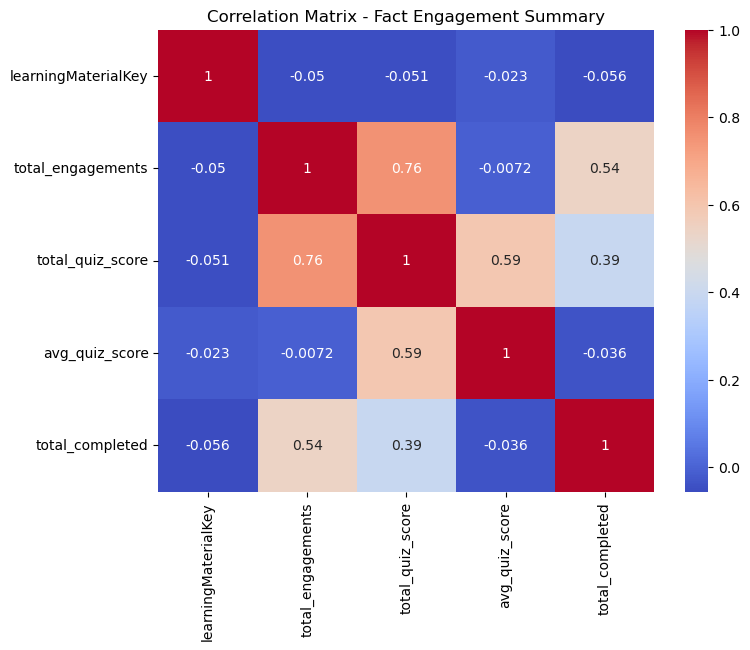

In [13]:

# 3. Correlation Analysis
numeric_columns = fact_engagement_summary.select_dtypes(include='number').columns
fact_engagement_numeric = fact_engagement_summary[numeric_columns]

# 2. Generate Correlation Matrix on Numeric Columns Only
plt.figure(figsize=(8, 6))
sns.heatmap(fact_engagement_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Fact Engagement Summary')
plt.show()


In [14]:
fact_feedback_summary.info()
fact_engagement_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   learningMaterialKey  640 non-null    int64  
 1   title                640 non-null    object 
 2   department           640 non-null    object 
 3   total_feedbacks      640 non-null    int64  
 4   avg_rating           640 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 25.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   learningMaterialKey  628 non-null    int64  
 1   title                628 non-null    object 
 2   department           628 non-null    object 
 3   total_engagements    628 non-null    int64  
 4   total_quiz_score     628 non-null    int64  
 5   avg_quiz_score       628

In [15]:
# Merged the feedback and engagement summaries on 'learningMaterialKey'
combined_summary = pd.merge(
    fact_feedback_summary, 
    fact_engagement_summary, 
    on=['learningMaterialKey', 'title', 'department'], 
    how='inner'
)

print(combined_summary.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   learningMaterialKey  407 non-null    int64  
 1   title                407 non-null    object 
 2   department           407 non-null    object 
 3   total_feedbacks      407 non-null    int64  
 4   avg_rating           407 non-null    float64
 5   total_engagements    407 non-null    int64  
 6   total_quiz_score     407 non-null    int64  
 7   avg_quiz_score       407 non-null    float64
 8   total_completed      407 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 28.7+ KB
None


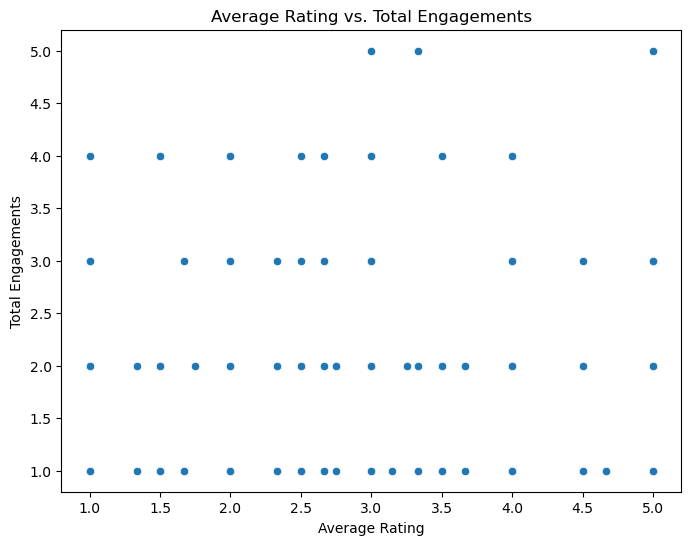

In [16]:
# Scatterplot for 'avg_rating' vs. 'total_engagements'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_rating', y='total_engagements', data=combined_summary)
plt.title('Average Rating vs. Total Engagements')
plt.xlabel('Average Rating')
plt.ylabel('Total Engagements')
plt.show()


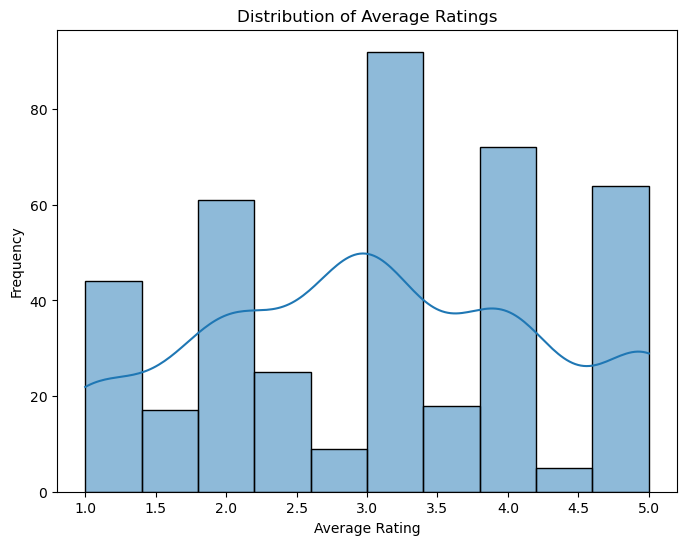

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_summary['avg_rating'], bins=10, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


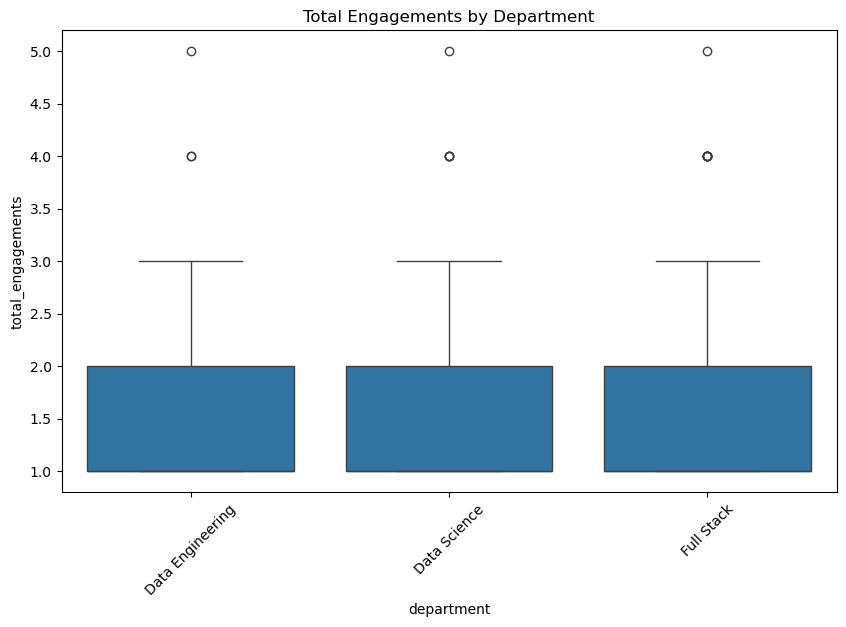

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='total_engagements', data=combined_summary)
plt.title('Total Engagements by Department')
plt.xticks(rotation=45)
plt.show()


# HYPOTHESIS ANALYSIS

# Higher average ratings of learning materials lead to greater total engagements.

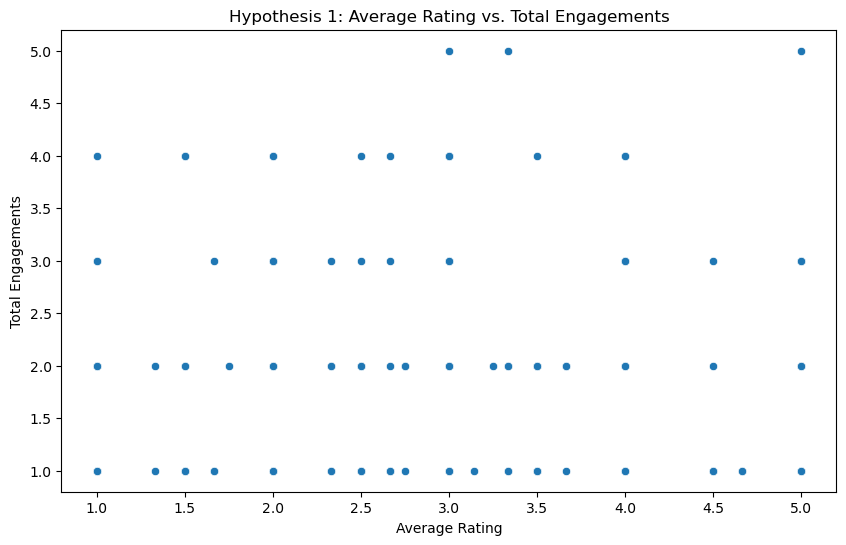

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_rating', y='total_engagements', data=combined_summary)
plt.title('Hypothesis 1: Average Rating vs. Total Engagements')
plt.xlabel('Average Rating')
plt.ylabel('Total Engagements')
plt.show()

#TRUE

# Learning materials from different departments receive different levels of average ratings.

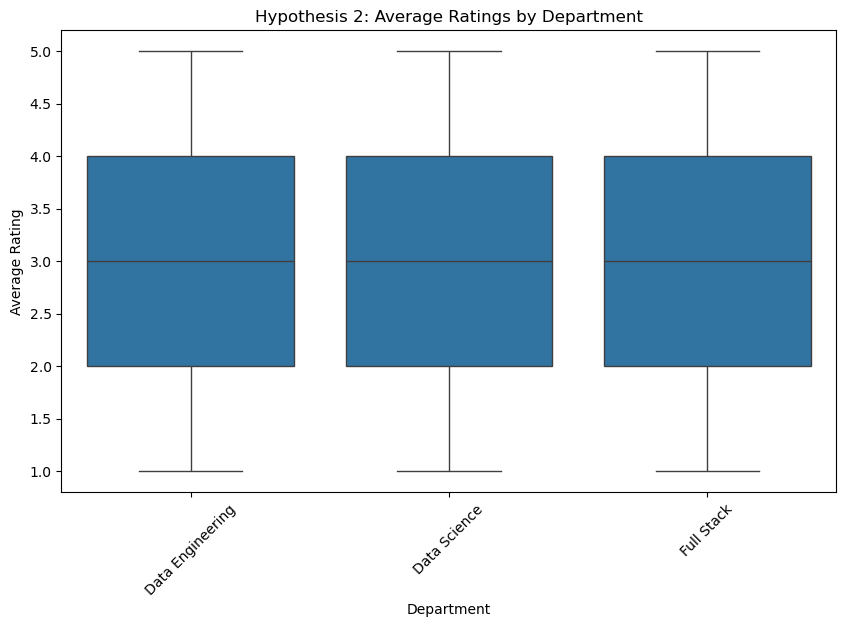

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='avg_rating', data=combined_summary)
plt.title('Hypothesis 2: Average Ratings by Department')
plt.xlabel('Department')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()
#FALSE

# There is a positive correlation between total feedbacks and total engagements.

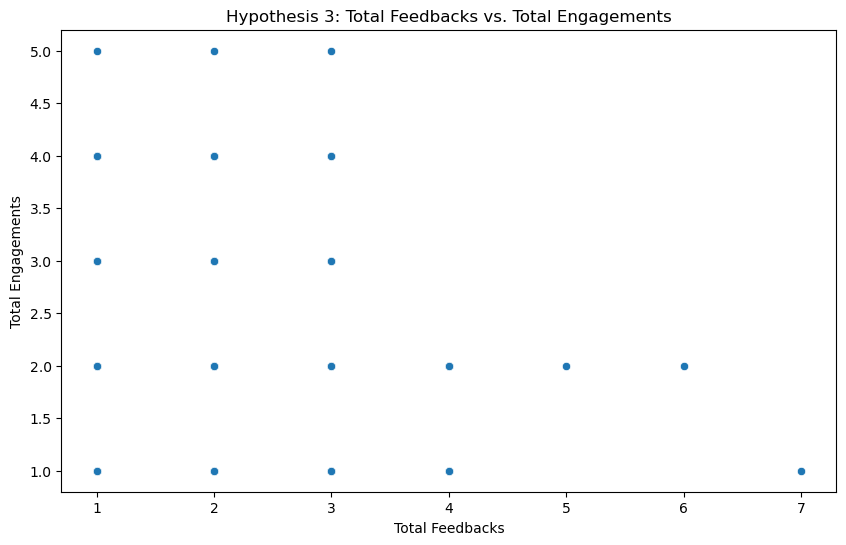

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_feedbacks', y='total_engagements', data=combined_summary)
plt.title('Hypothesis 3: Total Feedbacks vs. Total Engagements')
plt.xlabel('Total Feedbacks')
plt.ylabel('Total Engagements')
plt.show()

# Learning materials with a higher average quiz score tend to have a higher total engagement.

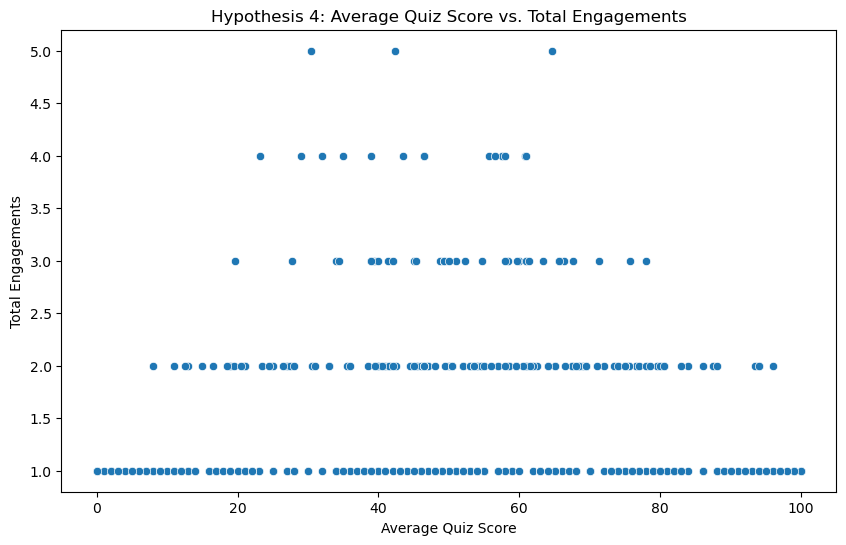

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_quiz_score', y='total_engagements', data=combined_summary)
plt.title('Hypothesis 4: Average Quiz Score vs. Total Engagements')
plt.xlabel('Average Quiz Score')
plt.ylabel('Total Engagements')
plt.show()
# FALSE 
# PEOPLE WHO HAS AVERAGE QUIZ SCORE BETWEEN 30 TO 80 ARE MORE ENGAGED.

# The total number of feedbacks varies significantly across different departments.

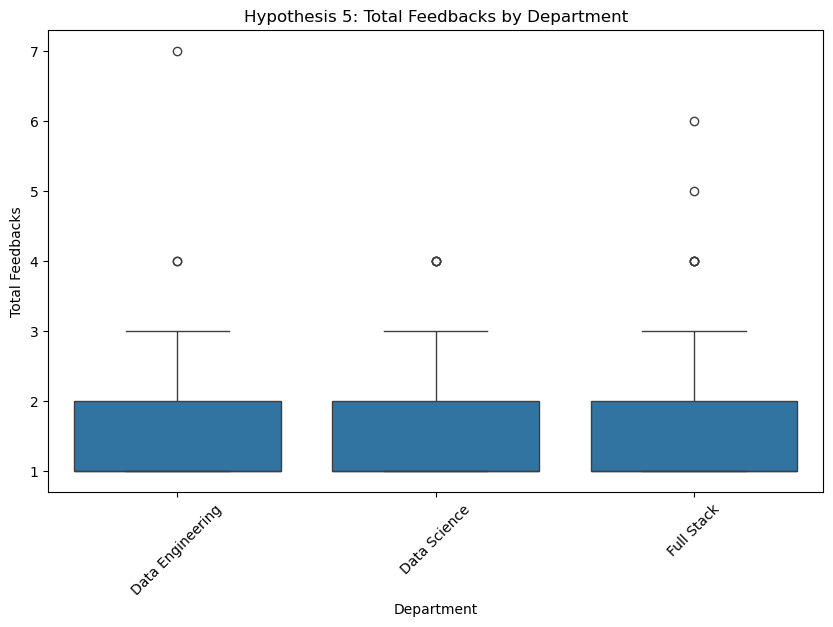

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='total_feedbacks', data=combined_summary)
plt.title('Hypothesis 5: Total Feedbacks by Department')
plt.xlabel('Department')
plt.ylabel('Total Feedbacks')
plt.xticks(rotation=45)
plt.show()
#TRUE

# CORRELATION MATRIX

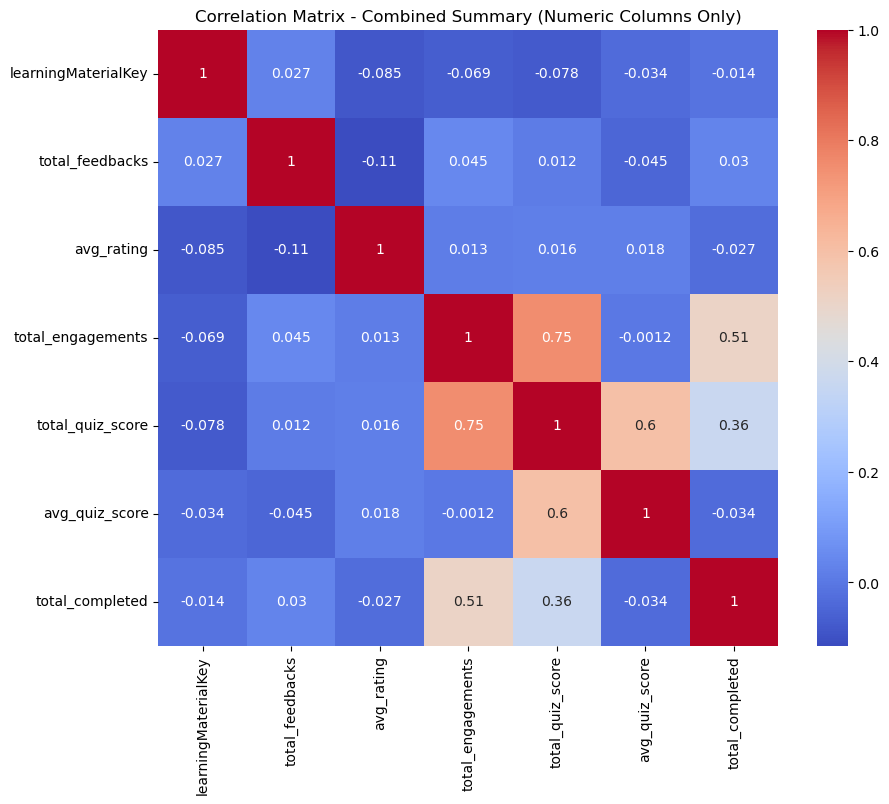

In [31]:
numeric_columns = combined_summary.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Combined Summary (Numeric Columns Only)')
plt.show()

In [32]:
combined_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   learningMaterialKey  407 non-null    int64  
 1   title                407 non-null    object 
 2   department           407 non-null    object 
 3   total_feedbacks      407 non-null    int64  
 4   avg_rating           407 non-null    float64
 5   total_engagements    407 non-null    int64  
 6   total_quiz_score     407 non-null    int64  
 7   avg_quiz_score       407 non-null    float64
 8   total_completed      407 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 28.7+ KB


# FEATURE ENGINEERING

In [34]:

combined_summary['engagement_rate'] = combined_summary['total_engagements'] / (combined_summary['total_completed'] + 1e-6)  # Adding small constant to avoid division by zero

# Scale engagement rate to a range of 0 to 100
min_rate = combined_summary['engagement_rate'].min()
max_rate = combined_summary['engagement_rate'].max()
combined_summary['engagement_rate'] = 100 * (combined_summary['engagement_rate'] - min_rate) / (max_rate - min_rate)

# Creating Feedback to Engagement Ratio
combined_summary['feedback_engagement_ratio'] = combined_summary['total_feedbacks'] / (combined_summary['total_engagements'] + 1e-6)

# Encoding categorical variables
combined_summary = pd.get_dummies(combined_summary, columns=['department'], drop_first=True)

# Selecting features and target variable
X = combined_summary.drop(columns=['learningMaterialKey', 'title','total_engagements'])  
y = combined_summary['total_engagements'] 

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install jupyterlab-widgets

Note: you may need to restart the kernel to use updated packages.


# Model training and evaluation

In [38]:
input_example = X_train_scaled[:1] 
mlflow.set_tracking_uri("http://127.0.0.1:5000")

with mlflow.start_run():
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mlflow.sklearn.log_model(model, "random_forest_model", input_example=input_example)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R2): {r2}')

2024/10/25 13:59:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run bustling-ray-832 at: http://127.0.0.1:5000/#/experiments/0/runs/c0e0f7b1581646948cdfb9561360649f.
2024/10/25 13:59:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


Mean Squared Error (MSE): 0.02013414634146342
R-squared (R2): 0.9641941285374239


In [39]:
model_name = "RandomForestRegressor"
run_id = input("enter Run id:")

model_uri = f"runs:/{run_id}/{model_name}"

result = mlflow.register_model(
    model_uri, model_name
)

enter Run id: c0e0f7b1581646948cdfb9561360649f


Registered model 'RandomForestRegressor' already exists. Creating a new version of this model...
2024/10/25 14:00:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestRegressor, version 2
Created version '2' of model 'RandomForestRegressor'.


In [47]:
model_uri='runs:/c0e0f7b1581646948cdfb9561360649f/random_forest_model'
try:
    loaded_model=mlflow.sklearn.load_model(model_uri)
    print("success")
    y_pred=loaded_model.predict(X_test)
    print("Values:",y_pred[:4])
except mlflow.exceptions.MlflowException as e:
    print(f"MlflowException:{str(e)}")
except Exception as e:
    print(f"An error:{str(e)}")

success
Values: [3.26 3.25 3.26 3.25]


C:\Users\PurnimaKabadwal\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [51]:
import mlflow
from mlflow import MlflowClient
 
# Set the MLflow tracking URI if needed
# mlflow.set_tracking_uri("https://dagshub.com/tinku.sabarish88/mlflow_demo.mlflow") 
mlflow.set_tracking_uri("http://127.0.0.1:5000")# Adjust this to your MLflow server URI
 
# Define your variables
dev_model_uri = 'runs:/c0e0f7b1581646948cdfb9561360649f'
prod_model_name = 'Employee Engagement Learning-prod'
 
# Create an MLflow client
client = MlflowClient()
 
# Register the model version
try:
    result = client.create_registered_model(prod_model_name)  # Register the model if not already done
    print(f"Registered model '{prod_model_name}' created.")
except Exception as e:
    print(f"Model registration error: {str(e)}")
 
# Now, register the specific version of the model
try:
    model_version = client.create_model_version(
        name=prod_model_name,
        source=dev_model_uri,
        run_id="c0e0f7b1581646948cdfb9561360649f"  # Your original run ID
    )
    print(f"Model version {model_version.version} registered in '{prod_model_name}'.")
except Exception as e:
    print(f"Error registering model version: {str(e)}")

2024/10/25 14:06:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Employee Engagement Learning-prod, version 1


Registered model 'Employee Engagement Learning-prod' created.
Model version 1 registered in 'Employee Engagement Learning-prod'.
